94    9372610.0
Name: area_country, dtype: float64

C:\Users\tatye\AppData\Local\Temp\ipykernel_4572\2322045634.py:54: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, linewidths=.5, ax=ax)


<AxesSubplot: >

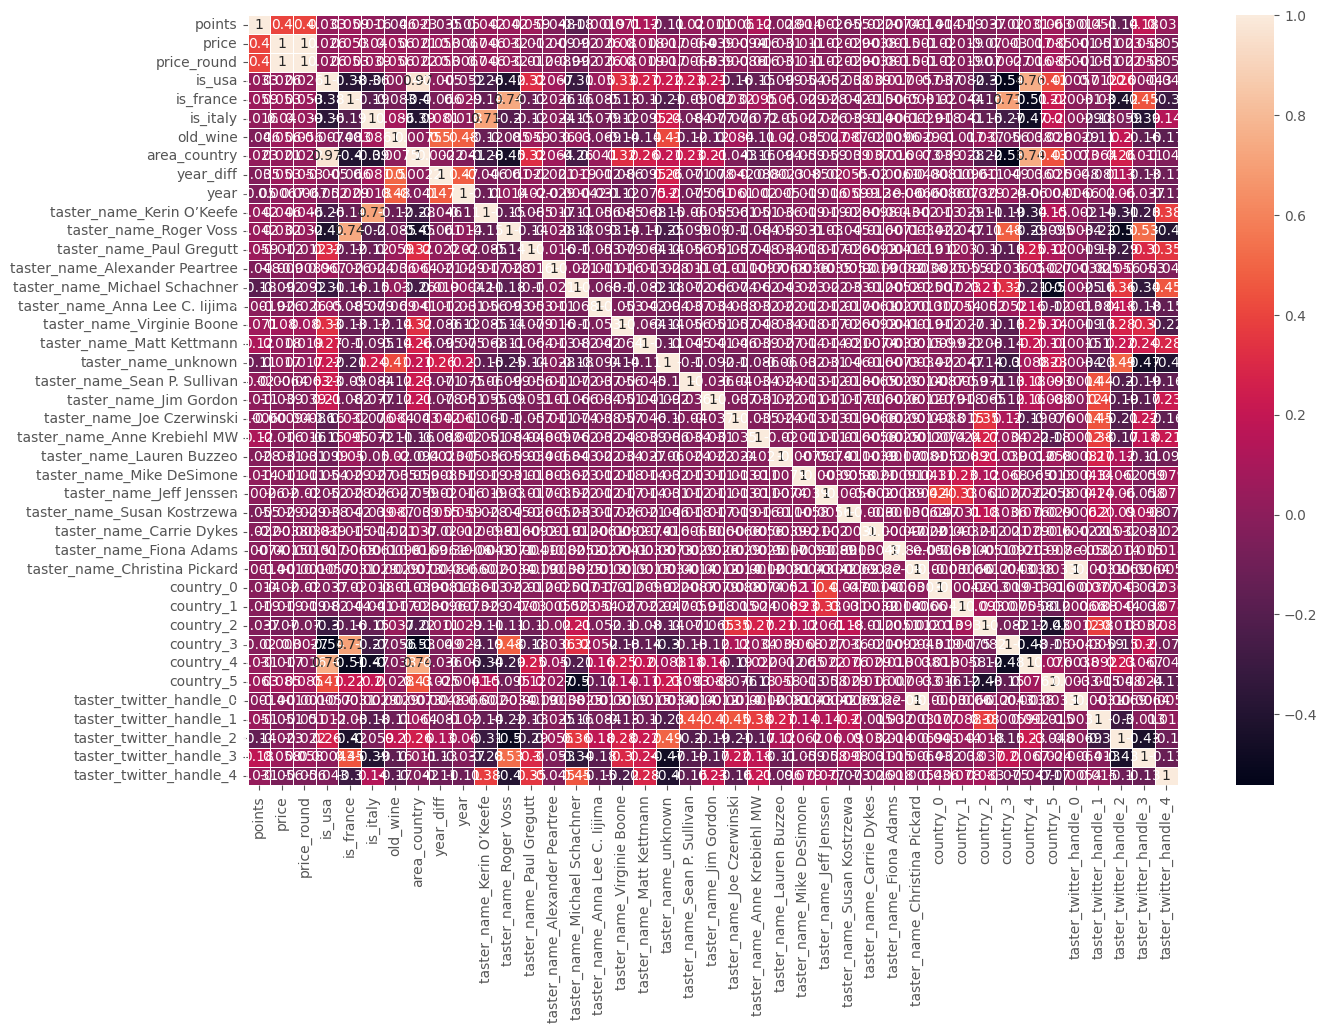

In [185]:
import pandas as pd
data = pd.read_csv('data/wine_cleared1.csv')
data['price_round'] = data['price'].round().astype(int)
regex = '\d{4}' # регулярное выражение для нахождения чисел
data['year'] = data['title'].str.findall(regex).str.get(0)
data['is_usa'] = data['country'].apply(lambda x: 1 if x == 'US' else 0)
data['is_france'] = data['country'].apply(lambda x: 1 if x == 'France' else 0)
data['is_italy'] = data['country'].apply(lambda x: 1 if x == 'Italy' else 0)

# преобразуем признак year в объект datetime для удобного сравнения дат
data['year'] = pd.to_datetime(data['year'], errors='coerce')

# для сравнения используем год, заполняем значения признака old_wine, где год вина меньше 2010
data['old_wine'] = data['year'].apply(lambda x: 1 if x.year < 2010 else 0) 
data['old_wine'].sum()
regex1 = '\([^()]+\)'
data['locality'] = data['title'].str.findall(regex1).str.get(0).astype(str).apply(lambda x: x[1:-1])

regex = '\((.*?)\)'
data['locality'] = data['title'].str.findall(regex).str.get(0)

country_population = pd.read_csv('data/country_population.csv', sep=';')

data = data.join(country_population.set_index('country'), on='country')

country_area = pd.read_csv('data/country_area.csv', sep=';')
data = data.join(country_area.set_index('country'), on='country')
data = data.rename(columns={'area': 'area_country'})
data = data.drop(data.columns[[0]], axis = 1)
display(round(data[data['title']== 'Gård 2014 Grand Klasse Reserve Lawrence Vineyards Viognier (Columbia Valley (WA))']
        ['area_country'],2))
data['year_diff'] = (pd.to_datetime('2022-01-12') - data['year']).dt.days

import category_encoders as ce

ord_encoder = ce.OrdinalEncoder(cols=['year'])
year_col = ord_encoder.fit_transform(data['year'])
data = pd.concat([data, year_col], axis=1)

encoder = ce.OneHotEncoder(cols=['taster_name'], use_cat_names=True)
type_bin = encoder.fit_transform(data['taster_name'])
data = pd.concat([data, type_bin], axis=1)

bin_encoder = ce.BinaryEncoder(cols = ['country'])
type_bin = bin_encoder.fit_transform(data['country'])
data = pd.concat([data, type_bin], axis =1)


ord_encoder1 = ce.BinaryEncoder(cols=['taster_twitter_handle'])
col = ord_encoder1.fit_transform(data['taster_twitter_handle'])
data = pd.concat([data, col], axis = 1)
import seaborn as sns
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(data.corr(), annot=True, linewidths=.5, ax=ax)



